In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
# configs
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

In [2]:
data= pd.read_csv('global-data-on-sustainable-energy.csv')

#### Exploratory Data Analysis

In [3]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,3649.0,2.010038e+03,6.054228e+00,2000.000000,2005.000000,2.010000e+03,2.015000e+03,2.020000e+03
Access to electricity (% of population),3639.0,7.893370e+01,3.027554e+01,1.252269,59.800890,9.836157e+01,1.000000e+02,1.000000e+02
Access to clean fuels for cooking,3480.0,6.325529e+01,3.904366e+01,0.000000,23.175000,8.315000e+01,1.000000e+02,1.000000e+02
Renewable-electricity-generating-capacity-per-capita,2718.0,1.131375e+02,2.441673e+02,0.000000,3.540000,3.291000e+01,1.122100e+02,3.060190e+03
Financial flows to developing countries (US $),1560.0,9.422400e+07,2.981544e+08,0.000000,260000.000000,5.665000e+06,5.534750e+07,5.202310e+09
Renewable energy share in the total final energy consumption (%),3455.0,3.263816e+01,2.989490e+01,0.000000,6.515000,2.330000e+01,5.524500e+01,9.604000e+01
Electricity from fossil fuels (TWh),3628.0,7.036500e+01,3.480519e+02,0.000000,0.290000,2.970000e+00,2.683750e+01,5.184130e+03
Electricity from nuclear (TWh),3523.0,1.345019e+01,7.300662e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,8.094100e+02
Electricity from renewables (TWh),3628.0,2.396801e+01,1.044311e+02,0.000000,0.040000,1.470000e+00,9.600000e+00,2.184940e+03
Low-carbon electricity (% electricity),3607.0,3.680118e+01,3.431488e+01,0.000000,2.877847,2.786507e+01,6.440379e+01,1.000000e+02


In [4]:
df = data
df_2020 = df[df['Year'] == 2020] # Taking into account the most recent data

fig = px.choropleth(df_2020,
                    locations="Entity",
                    locationmode='country names',
                    color="Access to electricity (% of population)",
                    hover_name="Entity",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Percentage of population per country that has access to electricity in 2020")
fig.show()

In [5]:
df_aggregated = df.groupby('Entity').agg({
    'Electricity from fossil fuels (TWh)': 'sum',
    'Electricity from nuclear (TWh)': 'sum',
    'Electricity from renewables (TWh)': 'sum'
}).reset_index()

df_melted = df_aggregated.melt(id_vars='Entity', var_name='Source', value_name='Electricity (TWh)')
fig = px.pie(df_melted, names='Source', values='Electricity (TWh)', color='Source', title='Main Sources of Electricity in Different Countries')
fig.update_layout(width=800, height=600)
fig.show()

In [6]:
df_global_electricity = df.groupby('Year')['Access to electricity (% of population)'].mean().reset_index()

fig = px.line(df_global_electricity, x='Year', y='Access to electricity (% of population)',
              title='Global Change in Access to Electricity (2000-2020)',
              labels={'Access to electricity (% of population)': 'Access to Electricity (%)'})
fig.update_layout(width=1200, height=600)
fig.show()

In [7]:
df_global_C02_emission = df.groupby('Year')['Value_co2_emissions_kt_by_country'].mean().reset_index()

fig = px.line(df_global_C02_emission, x='Year', y='Value_co2_emissions_kt_by_country',
              title='Global Change in C02 Emission (2000-2020)',
              labels={'Value_co2_emissions_kt_by_country': 'Global C02 Emission (kt)'})
fig.update_layout(width=1200, height=600)
fig.show()

In [8]:
# Top 10 countries with highest energy consumption

fossil_fuel_sum = df.groupby('Entity')['Electricity from fossil fuels (TWh)'].sum().sort_values(ascending=False).head(10).reset_index()

top_10_fossil_fuel_consumption_countries = []

for countries in fossil_fuel_sum.Entity:
    top_10_fossil_fuel_consumption_countries.append(countries)

fig = px.bar(fossil_fuel_sum, x='Entity', y='Electricity from fossil fuels (TWh)', title='Top 10 Countries by Electricity Consumption from Fossil Fuels (2000-2020)')
fig.update_layout(width=1200, height=600)
fig.show()

In [9]:
from plotly.subplots import make_subplots


def co2_emission_plot(country):
    co2_trend = df[df['Entity'] == country]
    fig = px.line(co2_trend, x='Year', y='Value_co2_emissions_kt_by_country', title=f'CO2 Emissions Trend for {country}')
    return fig

# List of top 10 fossil fuel consuming countries

# Create a subplot figure with 5 rows and 2 columns (for 10 plots)
fig = make_subplots(rows=5, cols=2, subplot_titles=top_10_fossil_fuel_consumption_countries)

# Add each CO2 emission plot to the subplot
for i, country in enumerate(top_10_fossil_fuel_consumption_countries):
    row = i // 2 + 1
    col = i % 2 + 1
    co2_plot = co2_emission_plot(country)
    for trace in co2_plot['data']:
        fig.add_trace(trace, row=row, col=col)

# Update layout for the entire figure
fig.update_layout(height=1800, width=1200, title_text="CO2 Emissions Trend for Top 10 Fossil Fuel Consuming Countries")
fig.show()

In [10]:
df.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

Visualising CO2 emissions in respective countries

In [11]:
average_co2_emission_by_country = data.groupby('Entity')['Value_co2_emissions_kt_by_country'].mean()

In [12]:
top_5_countries = average_co2_emission_by_country.nlargest(5)

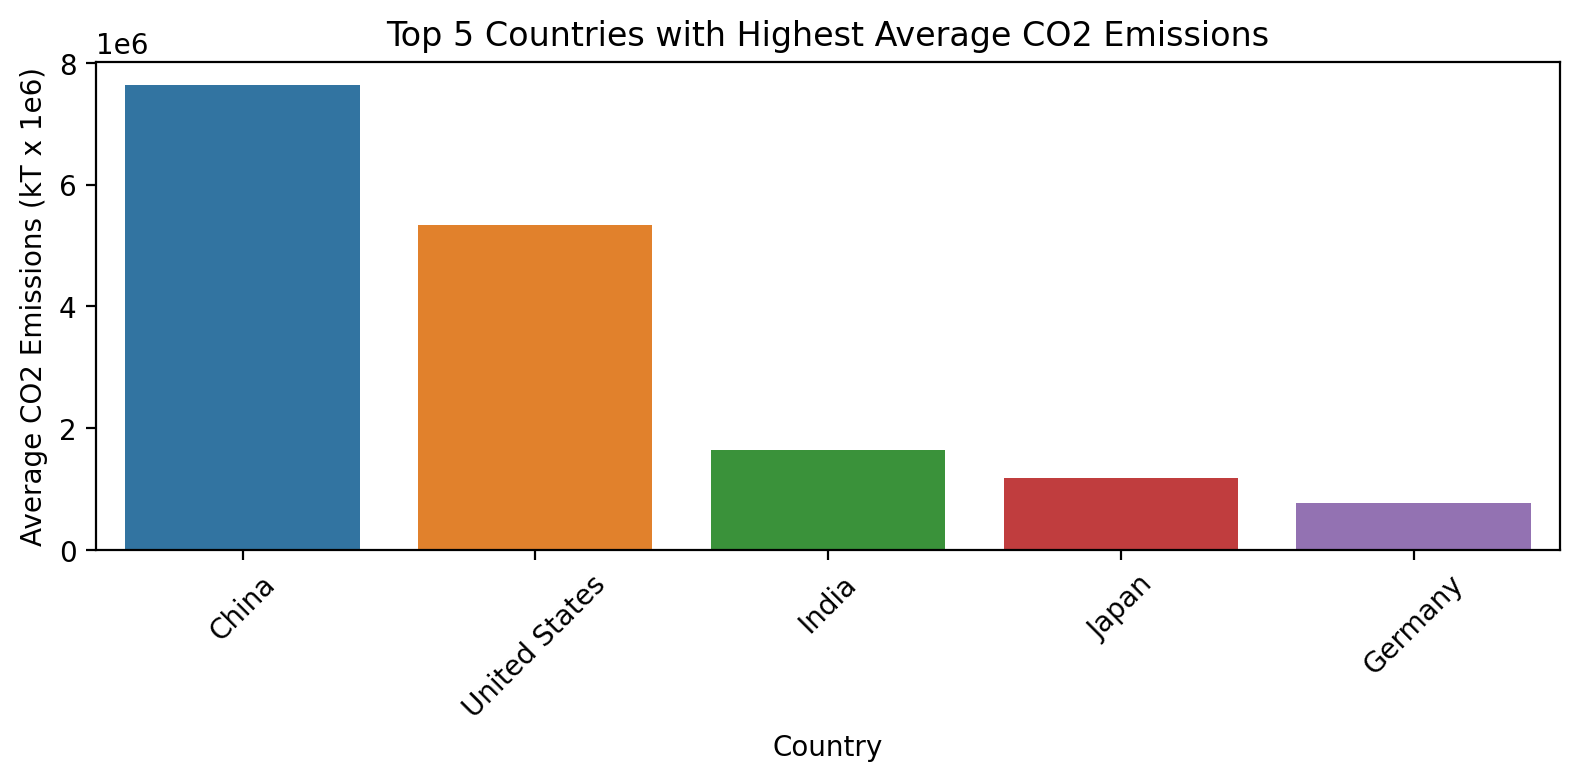

In [13]:
plt.figure(figsize = (8,4))
sns.barplot(x = top_5_countries.index, y = top_5_countries.values)
plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions (kT x 1e6)')
plt.title('Top 5 Countries with Highest Average CO2 Emissions')

plt.xticks(rotation = 45, ha = 'center')

plt.tight_layout()
plt.show()

Five countries with the lowest CO2 emissions

In [14]:
top_5_lowest_emissions = average_co2_emission_by_country.nsmallest(5)

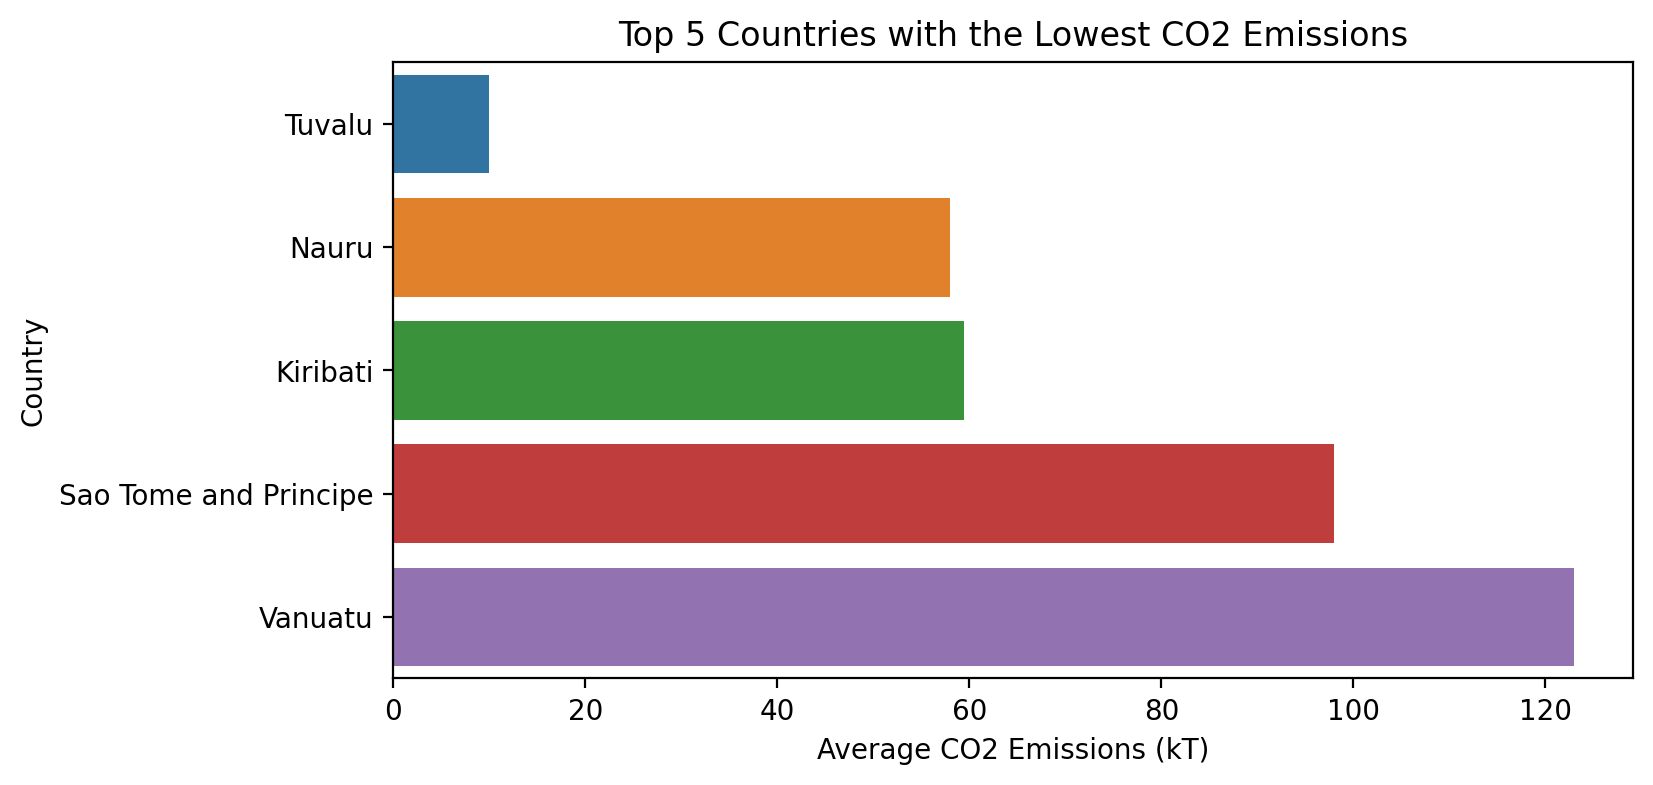

In [15]:
plt.figure(figsize = (8,4))
sns.barplot(x = top_5_lowest_emissions.values, y = top_5_lowest_emissions.index)
plt.xlabel('Average CO2 Emissions (kT)')
plt.ylabel('Country')
plt.title('Top 5 Countries with the Lowest CO2 Emissions')

plt.show()

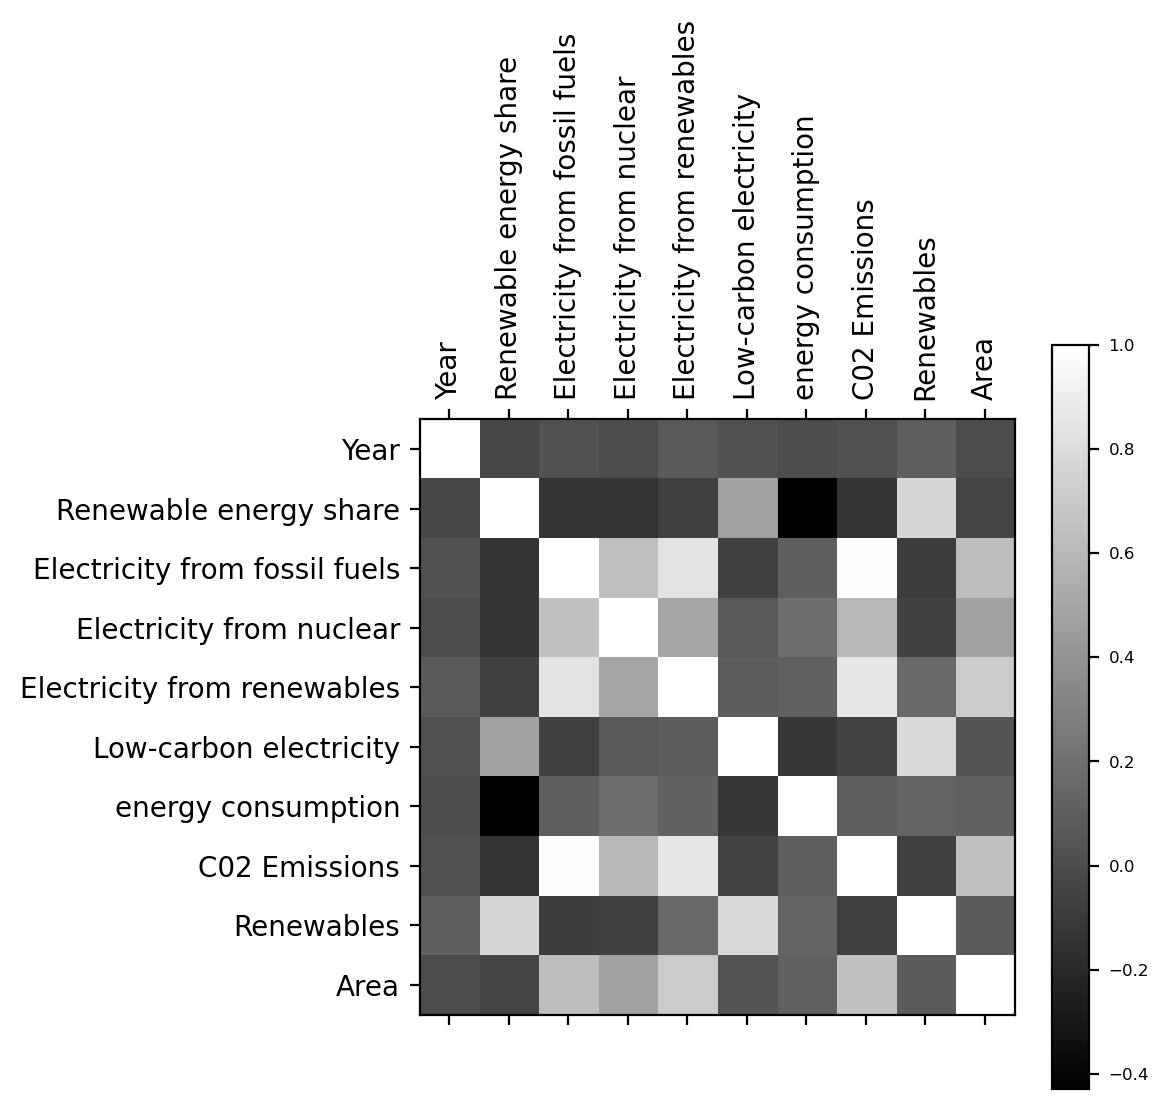

In [16]:
df = data
heatmap_cols = ['Entity', 'Year',
                'Renewable energy share in the total final energy consumption (%)',
                'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
                'Electricity from renewables (TWh)',
                'Low-carbon electricity (% electricity)',
                'Primary energy consumption per capita (kWh/person)',
                'Value_co2_emissions_kt_by_country',
                'Renewables (% equivalent primary energy)',
                'Land Area(Km2)']
numerical_features = [col for col in heatmap_cols if df[col].dtype != 'object']

correlation_matrix = df[numerical_features].corr()

heatmap_plot_cols = ['Year',
                'Renewable energy share',
                'Electricity from fossil fuels', 'Electricity from nuclear',
                'Electricity from renewables',
                'Low-carbon electricity',
                'energy consumption',
                'C02 Emissions',
                'Renewables',
                'Area']

# Create a heatmap visualization
plt.matshow(correlation_matrix, cmap = 'gist_gray')
plt.xticks(range(len(correlation_matrix.columns)), heatmap_plot_cols, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), heatmap_plot_cols)
plt.rcParams["figure.figsize"] = [6, 4]
plt.rcParams["font.size"] = 6
plt.colorbar()
plt.show()

In [17]:
df.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

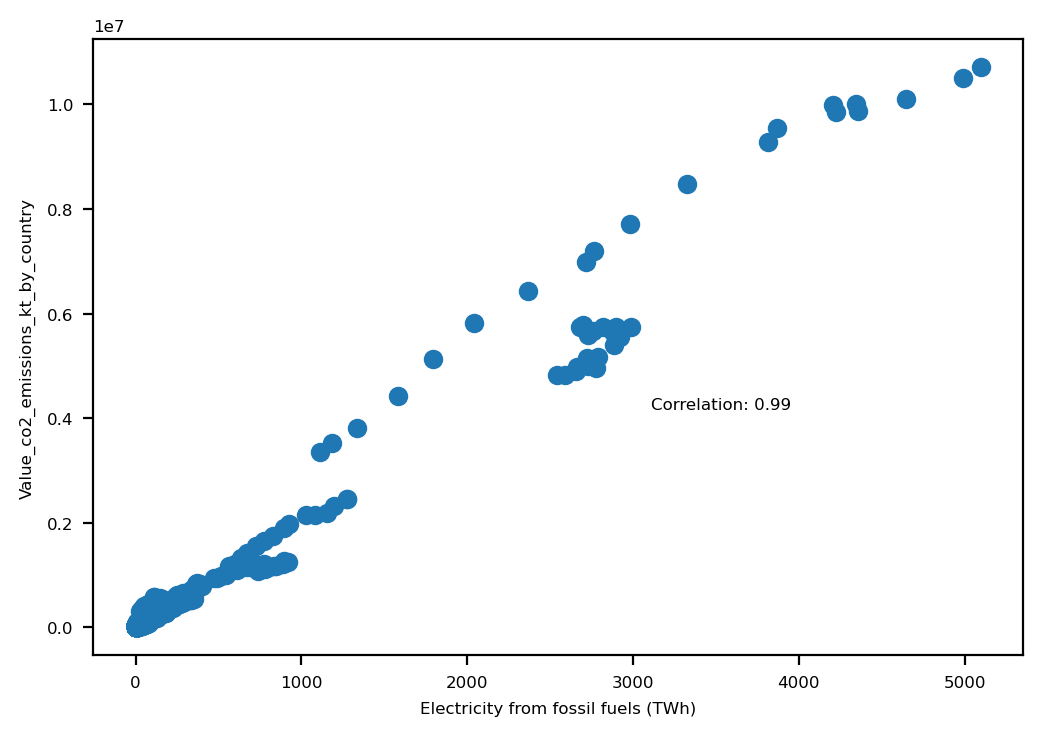

In [18]:
fossil_fuel_energy = df['Electricity from fossil fuels (TWh)']
C02_emission = df['Value_co2_emissions_kt_by_country']
correlation = C02_emission.corr(fossil_fuel_energy, method='pearson')

plt.scatter(fossil_fuel_energy, C02_emission)

# Add labels and title
plt.xlabel(fossil_fuel_energy.name)
plt.ylabel(C02_emission.name)
plt.annotate(f"Correlation: {correlation:.2f}", xy=(0.6, 0.4), xycoords='axes fraction')


# Display the plot
plt.show()

#### Data Quality Report

##### Continuous features report 

In [19]:
def build_continuous_features_report(data_df):

    """Build tabular report for continuous features"""

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Min": lambda df: df.min(),
        "1st Qrt.": lambda df: df.quantile(0.25),
        "Mean": lambda df: df.mean(),
        "Median": lambda df: df.median(),
        "3rd Qrt": lambda df: df.quantile(0.75),
        "Max": lambda df: df.max(),
        "Std. Dev.": lambda df: df.std(),
    }

    contin_feat_names = data_df.select_dtypes("number").columns
    continuous_data_df = data_df[contin_feat_names]

    report_df = pd.DataFrame(index=contin_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df


In [20]:
# build continuous features report
con_report_df = build_continuous_features_report(data)
con_report_df

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
Year,3649,0.000000,21,2000.000000,2005.000000,2.010038e+03,2.010000e+03,2.015000e+03,2.020000e+03,6.054228e+00
Access to electricity (% of population),3649,0.274048,2040,1.252269,59.800890,7.893370e+01,9.836157e+01,1.000000e+02,1.000000e+02,3.027554e+01
Access to clean fuels for cooking,3649,4.631406,896,0.000000,23.175000,6.325529e+01,8.315000e+01,1.000000e+02,1.000000e+02,3.904366e+01
Renewable-electricity-generating-capacity-per-capita,3649,25.513839,2110,0.000000,3.540000,1.131375e+02,3.291000e+01,1.122100e+02,3.060190e+03,2.441673e+02
Financial flows to developing countries (US $),3649,57.248561,1017,0.000000,260000.000000,9.422400e+07,5.665000e+06,5.534750e+07,5.202310e+09,2.981544e+08
Renewable energy share in the total final energy consumption (%),3649,5.316525,2587,0.000000,6.515000,3.263816e+01,2.330000e+01,5.524500e+01,9.604000e+01,2.989490e+01
Electricity from fossil fuels (TWh),3649,0.575500,1859,0.000000,0.290000,7.036500e+01,2.970000e+00,2.683750e+01,5.184130e+03,3.480519e+02
Electricity from nuclear (TWh),3649,3.453001,547,0.000000,0.000000,1.345019e+01,0.000000e+00,0.000000e+00,8.094100e+02,7.300662e+01
Electricity from renewables (TWh),3649,0.575500,1533,0.000000,0.040000,2.396801e+01,1.470000e+00,9.600000e+00,2.184940e+03,1.044311e+02
Low-carbon electricity (% electricity),3649,1.151000,2647,0.000000,2.877847,3.680118e+01,2.786507e+01,6.440379e+01,1.000000e+02,3.431488e+01


In [21]:
print("categorical features are :")
data.select_dtypes(exclude="number").columns

categorical features are :


Index(['Entity', 'Density\n(P/Km2)'], dtype='object')

##### Categorical features Report

In [22]:
def build_categorical_features_report(data_df):

    """Build tabular report for categorical features"""

    def _mode(df):
        return df.apply(lambda ft: ",".join(ft.mode().to_list()))

    def _mode_freq(df):
        return df.apply(lambda ft: ft.value_counts()[ft.mode()].sum())

    def _second_mode(df):
        return df.apply(lambda ft: ",".join(ft[~ft.isin(ft.mode())].mode().to_list()))

    def _second_mode_freq(df):
        return df.apply(
            lambda ft: ft[~ft.isin(ft.mode())]
            .value_counts()[ft[~ft.isin(ft.mode())].mode()]
            .sum()
        )

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Mode": _mode,
        "Mode Freq": _mode_freq,
        "Mode %": lambda df: _mode_freq(df) / len(df) * 100,
        "2nd Mode": _second_mode,
        "2nd Mode Freq": _second_mode_freq,
        "2nd Mode %": lambda df: _second_mode_freq(df) / len(df) * 100,
    }

    cat_feat_names = data_df.select_dtypes(exclude="number").columns
    cat_data_df = data_df[cat_feat_names]

    report_df = pd.DataFrame(index=cat_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(cat_data_df)

    return report_df


In [23]:
# build categorical feature report
cat_report_df = build_categorical_features_report(data)
cat_report_df

,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
Entity,3649,0.000000,176,"Afghanistan,Albania,Algeria,Angola,Antigua and...",3612,98.986024,"Montenegro,Serbia",28,0.767334
Density\n(P/Km2),3649,0.027405,124,25,147,4.028501,18,113,3.096739


##### Checking duplicates

In [24]:
# Check for duplicate rows
num_duplicates = data.duplicated().sum()
print("Number of Duplicate Rows:", num_duplicates)

Number of Duplicate Rows: 0


##### Checking outliers

In [25]:
def detect_outliers(col):
    """Detect outliers in a dataframe column

    Args:
        col (pd.Series): A dataframe column

    Returns:
        pd.Series: Outliers
    """
    Q1 = np.percentile(col, 25)
    Q3 = np.percentile(col, 75)
    IQR = Q3 - Q1
    outlier_step = IQR * 1.5

    return col[(col < Q1 - outlier_step) | (col > Q3 + outlier_step)]


In [26]:
outliers_df = (
    data.select_dtypes("number")
    .apply(lambda col: detect_outliers(col).size)
    .rename("Num outliers")
    .to_frame()
).query("`Num outliers` > 0")

outliers_df["Percent outliers"] = outliers_df["Num outliers"] / len(data) * 100
outliers_df.sort_values(by="Percent outliers", ascending=False)


,Num outliers,Percent outliers
Primary energy consumption per capita (kWh/person),237,6.49493


#### Data Quality Plan

#### Data Preparation

Convert the types to the desired ones

In [27]:
def remove_functuation(density):
    return density.replace(',','')
data['Entity']=data['Entity'].astype(str)
data['Density\\n(P/Km2)']=data['Density\\n(P/Km2)'].astype(str)
data['Density\\n(P/Km2)']=data['Density\\n(P/Km2)'].apply(remove_functuation)
data['Density\\n(P/Km2)']=data['Density\\n(P/Km2)'].astype(float)

##### Handling missing values

In [28]:
#Handling missing values in continuous features
missing_con_cols = con_report_df.query("`Miss %` > 0.0").index
#print(missing_con_cols)
feature_with_null=[column for column in missing_con_cols if column not in ['Year','Primary energy consumption per capita (kWh/person)']]
#print(feature_with_null)
# Replacing values with mean
data.fillna(data[feature_with_null].mean(),inplace=True)

In [29]:
# Handling missing values in categorical features
cat_missing = cat_report_df.query("`Miss %` > 0").index


cat_fillna_vals = data[cat_missing].mode().squeeze()
data = data.fillna(cat_fillna_vals)

In [30]:
data.isna().sum()

Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Financial flows to developing countries (US $)                      0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
Renewables (% equiva

In [31]:
data.isnull().sum()

Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Financial flows to developing countries (US $)                      0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
Renewables (% equiva